In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [0]:
import random
import time
import glob
import sys
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Lambda

%matplotlib inline

Using TensorFlow backend.


In [0]:
def load_data(input_size, path):
    print("Loading training data...")
    start = time.time()

    # load training data
    X = np.empty((0, input_size))
    y = np.empty((0, 4))
    training_data = glob.glob(path)

    # if no data, exit
    if not training_data:
        print("Data not found, exit")
        sys.exit()

    for single_npz in training_data:
        with np.load(single_npz) as data:
            train = data['train']
            train_labels = data['train_labels']
        X = np.vstack((X, train))
        y = np.vstack((y, train_labels))

    y = y[:, :3]
    print("Image array shape: ", X.shape)
    print("Label array shape: ", y.shape)

    end = time.time()
    print("Loading data duration: %.2fs" % (end - start))
    return X, y

In [0]:
# fix seed
tf.set_random_seed(123)
np.random.seed(123)

shape = (120, 360)
num_classes = 3
data_path ="*.npz"

X, y = load_data(shape[0]*shape[1], data_path)

Loading training data...
Image array shape:  (286, 43200)
Label array shape:  (286, 3)
Loading data duration: 0.46s


In [0]:
# reshape data 
X = X.reshape(X.shape[0], shape[0], shape[1], 1)

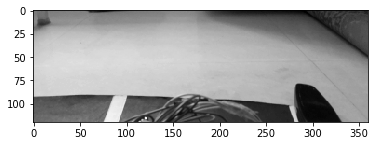

In [0]:
collections.Counter(y.argmax(-1))
plt.imshow(X[50].reshape(shape), cmap='gray')

In [0]:
model = Sequential()
model.add(Lambda(lambda x: (x/255.), input_shape=(*shape, 1)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 120, 360, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 356, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 178, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 174, 32)       12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 87, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 75168)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_test.h5', 
                             verbose=1, 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='auto')
callback_list = [checkpoint]

In [0]:
batch_size = 16
epochs = 50

history = model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2,
          callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 228 samples, validate on 58 samples
Epoch 1/50





228/228 [==============================] - 12s 54ms/step - loss: 1.0028 - acc: 0.5088 - val_loss: 0.6926 - val_acc: 0.8793

Epoch 00001: val_loss improved from inf to 0.69259, saving model to model_test.h5
Epoch 2/50
228/228 [==============================] - 11s 50ms/step - loss: 0.6815 - acc: 0.7368 - val_loss: 0.3812 - val_acc: 0.8793

Epoch 00002: val_loss improved from 0.69259 to 0.38116, saving model to model_test.h5
Epoch 3/50
228/228 [==============================] - 11s 50ms/step - loss: 0.4389 - acc: 0.8377 - val_loss: 0.2096 - val_acc: 0.9138

Epoch 00003: val_loss improved from 0.38116 to 0.20964, saving model to model_test.h5
Epoch 4/50
228/228 [==============================] - 11s 50ms/step - loss: 0.3546 - acc: 0.8684 - val_loss: 0.1345 - val_acc: 0.9310

Epoch 00004: val_loss improved from 0.20964 to 0.13449, sav

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


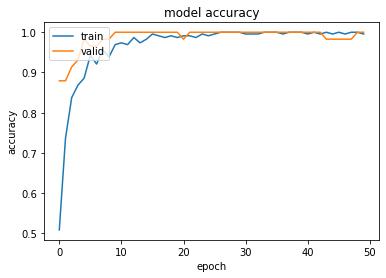

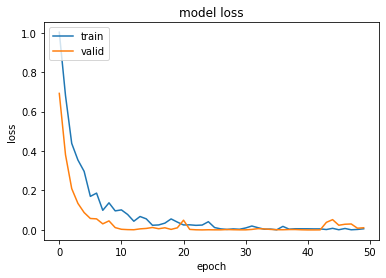

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
from keras.models import load_model

model = load_model('model_test.h5')

In [0]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 120, 360, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 356, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 178, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 174, 32)       12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 87, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 75168)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
test_data_path = "*.npz"
X_test, y_test = load_data(120*360, test_data_path)

Loading training data...
Image array shape:  (286, 43200)
Label array shape:  (286, 3)
Loading data duration: 0.44s


In [0]:
X_test = X_test.reshape(X_test.shape[0], 120, 360, 1)

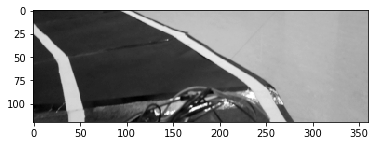

In [0]:
plt.imshow(X_test[200].reshape((120, 360)), cmap='gray')

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, -1)

print(y_pred)
print(y_true)
print(accuracy_score(y_true, y_pred))
print()
print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

accuracy = np.mean(y_pred == y_true)
print(accuracy*100)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0